# The selection of principle components

This notebook is dedicated to illustrate all the principle components of the PCA outputs done in R Studio. By visually interpretation, we need to select a few of them which contain the most unique patterns. After this step, we export our selection into a txt file and continue the work in R Studio. 

The workflow is as following: 
1. Import the output PCA raster files generated in R Studio. 
2. Separate each band and illustrate all of them. 
3. Select the most informative ones. 
4. Export the selection into a txt file which will be read in R Studio. 

In [30]:
import os
import numpy as np
# 16 Oct 2023: gdal must be imported first, and then rasterio can be imported
from osgeo import gdal
import rasterio as rio

In [3]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_ProcessedRaster = cwd + '\\ProcessedData'
cwd_Results = cwd + '\\Results'

In [4]:
# Get the paths of PCA files. 
raster_names = os.listdir(cwd_ProcessedRaster)
print(raster_names)
path_PCA = []
for x in raster_names:
    temp = cwd_Results + "\\" + x + "Cropped\\SPCA\\PCA\\OutputPCA_8_PCs"
    path_PCA.append(temp)
path_PCA

['2022 06', '2022 09']


['c:\\Users\\m1865\\Desktop\\Ticino\\Results\\2022 06Cropped\\SPCA\\PCA\\OutputPCA_8_PCs',
 'c:\\Users\\m1865\\Desktop\\Ticino\\Results\\2022 09Cropped\\SPCA\\PCA\\OutputPCA_8_PCs']

In [5]:
# Read PCA raster files
raw_Raster = []
for x in path_PCA:
    temp_Raster = rio.open(x)
    raw_Raster.append(temp_Raster)
raw_Raster

[<open DatasetReader name='c:/Users/m1865/Desktop/Ticino/Results/2022 06Cropped/SPCA/PCA/OutputPCA_8_PCs' mode='r'>,
 <open DatasetReader name='c:/Users/m1865/Desktop/Ticino/Results/2022 09Cropped/SPCA/PCA/OutputPCA_8_PCs' mode='r'>]

In [79]:
# We can check how many bands there are in the raster file
raw_Raster[0].indexes

tuple

In [80]:
# Get the total number of bands
num_index = len(raw_Raster[0].indexes)
num_index

8

In [77]:
# Now we need to get the leftmost x value in our raster where there is data, so we can set the plot extent based on it
check = np.nansum(raw_Raster[0].read(1), axis = 0)
x_leftmost = np.argwhere(check == 0)[-1][0] 
x_leftmost

2269

In [7]:
from matplotlib import pyplot as plt
from rasterio.plot import show

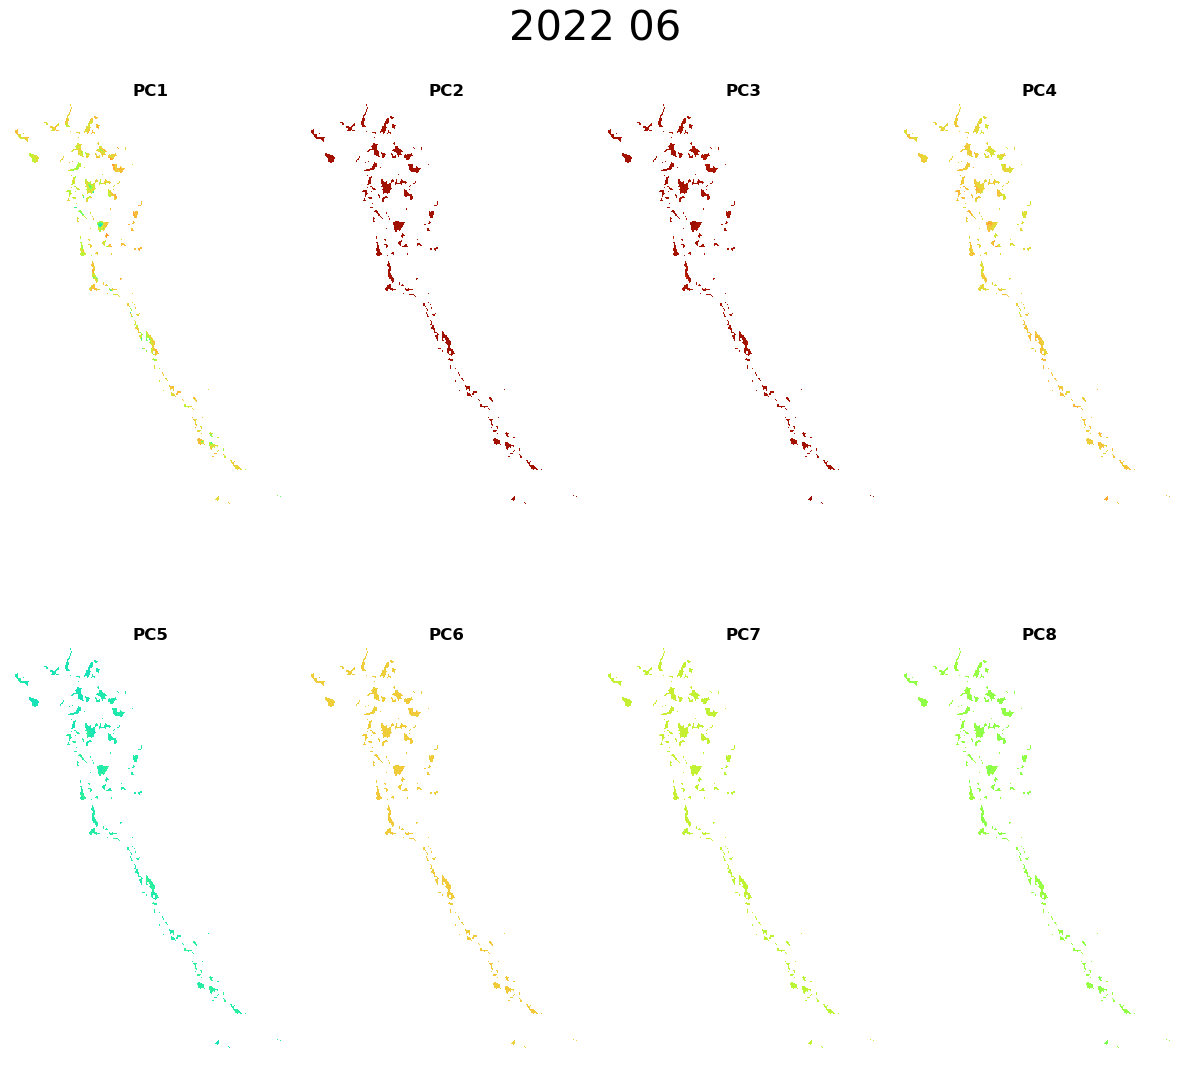

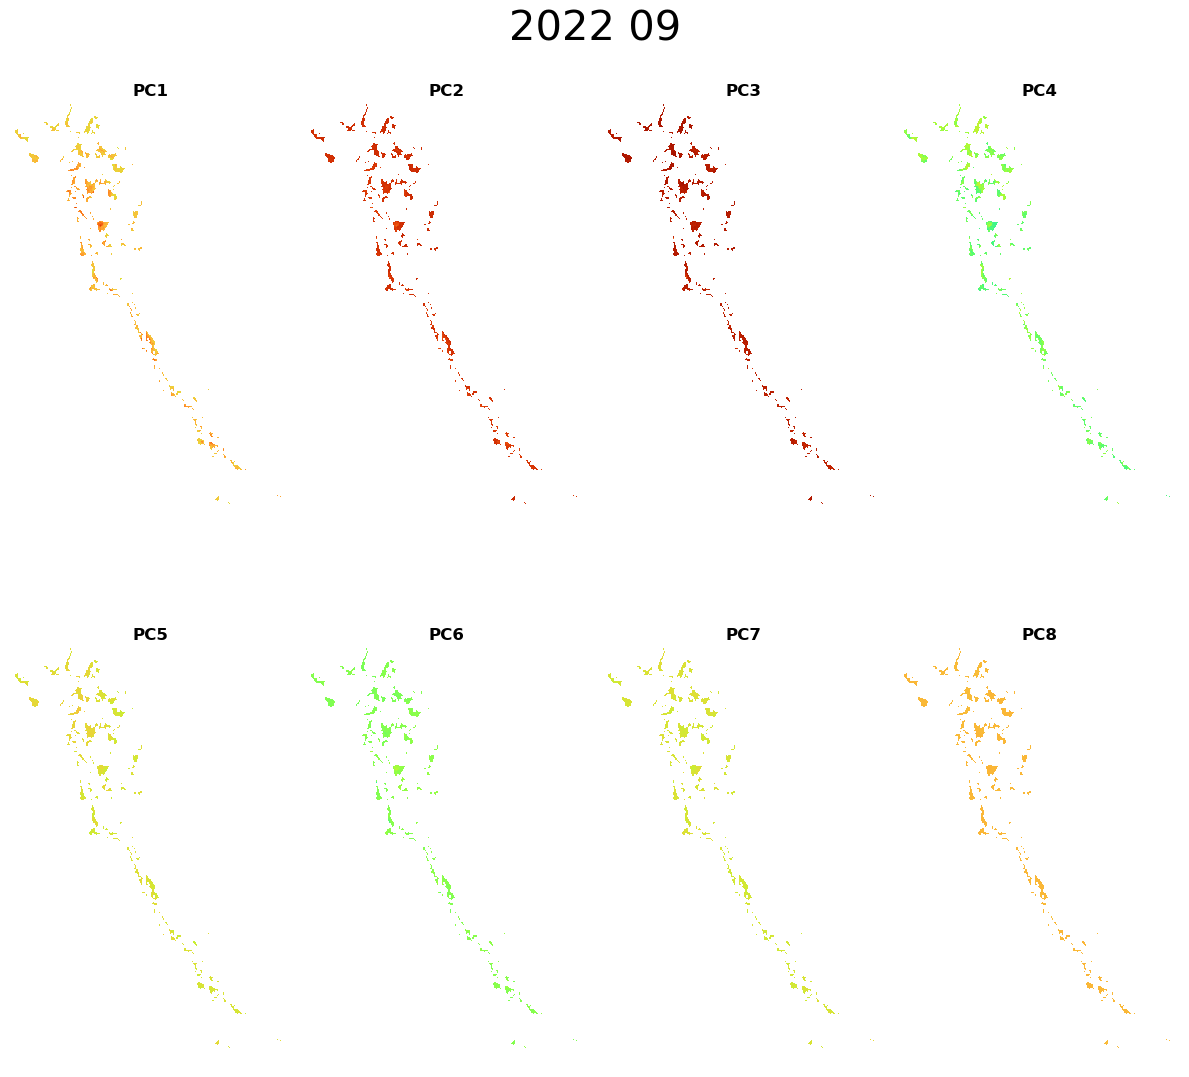

In [101]:
# Subplot! 
count = 0
for raster in raw_Raster:
    fig, axs = plt.subplots(2,int(num_index/2), sharex=True, figsize=(12, 12))
    for i in range(1,num_index+1):
        show(raster.read(i), ax = axs[0 if i<=4 else 1, i-1 if i<=4 else i-5], cmap = 'turbo', title = ('PC' + str(i)))
    plt.xlim(left = x_leftmost)
    for ax1 in axs:
        for ax2 in ax1:
            ax2.axis('off')
    fig.tight_layout()
    fig.suptitle(raster_names[count], fontsize=30)
    plt.show
    count = count + 1

